In [2]:
# Importing python packages
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})

#Importing and reading CSV file
file_input = 'C:\\Users\\Sneha Rani\\autos.csv'
df1 = pd.read_csv(file_input, encoding='latin-1', index_col=None)

# Filling missing values
df1['vehicleType'].fillna(value='not-available', inplace=True)
df1['gearbox'].fillna(value='not-available', inplace=True)
df1['model'].fillna(value='not-available', inplace=True)
df1['fuelType'].fillna(value='not-available', inplace=True)
df1['notRepairedDamage'].fillna(value='not-available', inplace=True)

# Removing the timestamp from a datetime in datadrame
df1['dateCreated'] = pd.to_datetime(df1['dateCreated'])

      
# scaled feature in a 'kilometer' column
df1['kilometer'] = df1['kilometer']/1000


columns_to_keep = ['price','vehicleType','yearOfRegistration','gearbox','powerPS','model',
                   'kilometer','fuelType','brand','notRepairedDamage','dateCreated','postalCode']

df1 = df1[columns_to_keep]


# Removing some extreme outliers
df1 = df1[(df1.price > 100) 
      & (df1.price < 100000) 
      & (df1.powerPS > 0) 
      & (df1.powerPS < 1000)
      & (df1.yearOfRegistration >=1900)
      & (df1.yearOfRegistration <=2018)]

df1.head()

Populating the interactive namespace from numpy and matplotlib


,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode
1,18300,coupe,2011,manuell,190,not-available,125.0,diesel,audi,ja,2016-03-24,66954
2,9800,suv,2004,automatik,163,grand,125.0,diesel,jeep,not-available,2016-03-14,90480
3,1500,kleinwagen,2001,manuell,75,golf,150.0,benzin,volkswagen,nein,2016-03-17,91074
4,3600,kleinwagen,2008,manuell,69,fabia,90.0,diesel,skoda,nein,2016-03-31,60437
5,650,limousine,1995,manuell,102,3er,150.0,benzin,bmw,ja,2016-04-04,33775


### Few more exploratory data analysis based on the price of the car 

#### Does postal code have an impact on the price? Does price vary of different region?

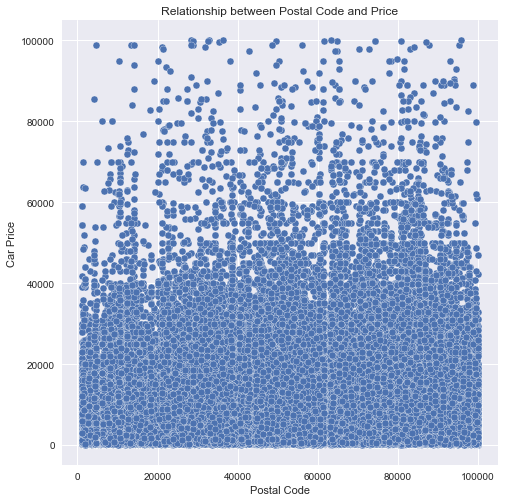

In [3]:
sns.pairplot(df1, x_vars=['postalCode'], y_vars=['price'], size=7)
plt.xlabel("Postal Code")
plt.ylabel("Car Price")
plt.title("Relationship between Postal Code and Price")

*The postal code is one of the feature which may be helpful in determining the location of the car, but the above scatter plot doesn't show any pattern between postal code and price. Prices range of the cars across various regions are distributed all along. One of the possible reason may be that all the postal codes are within Germany. So, this column may not be helpful for creating the model.*

#### Is there any variance in the price of the car based on year of registration? Does vehicle of various types impact differently on car price and year of registeration?

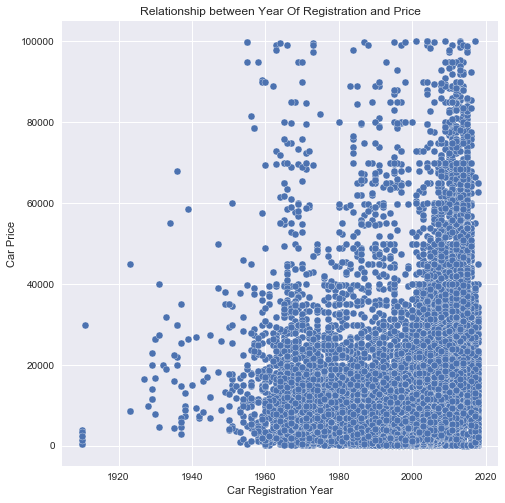

In [4]:
sns.pairplot(df1, x_vars=['yearOfRegistration'], y_vars=['price'], size=7)
plt.xlabel("Car Registration Year")
plt.ylabel("Car Price")
plt.title("Relationship between Year Of Registration and Price")

*From the above graph based on year v.s. price, we see that newly registered cars seem to be more expensive than the older ones.
However, there are also some old cars which are also expensive.*

(0.35264220422036979, 0.0)

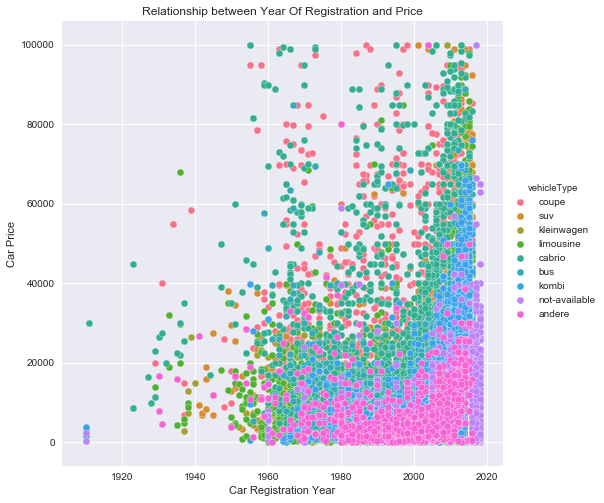

In [5]:
sns.pairplot(df1, x_vars=['yearOfRegistration'], y_vars=['price'], size=7, hue='vehicleType')
plt.xlabel("Car Registration Year")
plt.ylabel("Car Price")
plt.title("Relationship between Year Of Registration and Price")
stats.pearsonr(df1['yearOfRegistration'], df1['price'])

*The above scatter plot shows that there exists a positive relationship between year of registration and price. But, Pearson correlation coefficient for the above graph is **0.35** which shows the strength of the relationship is weak between the year of registration and price. I further grouped the plot by vehichle type and checked Pearson correlation coefficient for each vehichle type. I specifically plotted for vehicle type 'kombi' as it showed a strong positive correlation of **0.70** among all the vehichle types.*

In [6]:
car_type = df1[df1.vehicleType =='coupe']
print('Coupe:', stats.pearsonr(car_type['yearOfRegistration'], car_type['price']))

car_type = df1[df1.vehicleType =='suv']
print('SUV:', stats.pearsonr(car_type['yearOfRegistration'], car_type['price']))

car_type = df1[df1.vehicleType =='kleinwagen']
print('Kleinwagen:', stats.pearsonr(car_type['yearOfRegistration'], car_type['price']))

car_type = df1[df1.vehicleType =='limousine']
print('Limousine:', stats.pearsonr(car_type['yearOfRegistration'], car_type['price']))

car_type = df1[df1.vehicleType =='cabrio']
print('Cabrio:', stats.pearsonr(car_type['yearOfRegistration'], car_type['price']))

car_type = df1[df1.vehicleType =='bus']
print('Bus:', stats.pearsonr(car_type['yearOfRegistration'], car_type['price']))

car_type = df1[df1.vehicleType =='kombi']
print('Kombi:', stats.pearsonr(car_type['yearOfRegistration'], car_type['price']))

car_type = df1[df1.vehicleType =='andere']
print('Andere:', stats.pearsonr(car_type['yearOfRegistration'], car_type['price']))

Coupe: (0.25439642616188629, 6.449605497802356e-251)
SUV: (0.48604793182200673, 0.0)
Kleinwagen: (0.66148132555879025, 0.0)
Limousine: (0.55534208592382139, 0.0)
Cabrio: (0.18891695123699445, 5.0371924938891284e-170)
Bus: (0.49753307026742932, 0.0)
Kombi: (0.70084721974239128, 0.0)
Andere: (0.087230386210689445, 1.1227108511674924e-05)


(0.70084721974239128, 0.0)

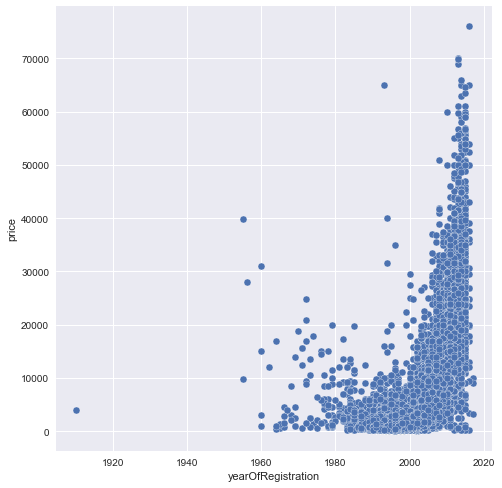

In [7]:
# Correlation on car price and year of registeration in 'Kombi' vehicle 
car_type = df1[df1.vehicleType =='kombi']      
sns.pairplot(car_type,x_vars=['yearOfRegistration'], y_vars=['price'], size=7)
stats.pearsonr(car_type['yearOfRegistration'], car_type['price'])

*This plot clearly shows that as the year of registration increases, car prices also increases which means price value of old age cars are cheaper than new ones in 'Kombi' types of vehicle.*

### How horse power of a car impact the price range?

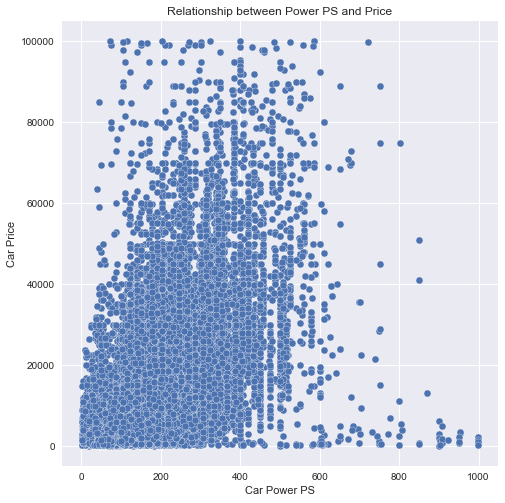

In [8]:
sns.pairplot(df1, x_vars=['powerPS'], y_vars=['price'], size=7)
plt.xlabel("Car Power PS")
plt.ylabel("Car Price")
plt.title("Relationship between Power PS and Price")

*Based on powerPS v.s price graph, low powerPS cars are cheaper than others. Most of the data points lie between 0-500 ps power car which does indicate the most consuming powerPS of used cars which are on sale. Similarly, power cars do have varied price range which does indicate that there are other factors contributing to that power variation also.*

In [9]:
final_data = ['price','vehicleType','yearOfRegistration','gearbox','powerPS','model',
                   'kilometer','fuelType','brand','notRepairedDamage','dateCreated']
df1 = df1[final_data]
df1.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated
1,18300,coupe,2011,manuell,190,not-available,125.0,diesel,audi,ja,2016-03-24
2,9800,suv,2004,automatik,163,grand,125.0,diesel,jeep,not-available,2016-03-14
3,1500,kleinwagen,2001,manuell,75,golf,150.0,benzin,volkswagen,nein,2016-03-17
4,3600,kleinwagen,2008,manuell,69,fabia,90.0,diesel,skoda,nein,2016-03-31
5,650,limousine,1995,manuell,102,3er,150.0,benzin,bmw,ja,2016-04-04


**At last, I am trying to see how the variables are correlated to one another and more importantly  seeing its influence on the prices of the used cars.**

In [16]:
# Converting strings to categorical values
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_features = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType', 'dateCreated']
le={}

#Converting Categorical Data using Label Encoder
for i in label_features:
     le[i]=preprocessing.LabelEncoder()

for i in label_features:
     df1[i]=le[i].fit_transform(df1[i])
df1.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated
1,18300,3,2011,1,190,163,125.0,3,1,0,96
2,9800,8,2004,0,163,119,125.0,3,14,2,86
3,1500,4,2001,1,75,118,150.0,1,38,1,89
4,3600,4,2008,1,69,103,90.0,3,31,1,103
5,650,6,1995,1,102,11,150.0,1,2,0,107


,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated
price,1.000000,-0.017687,0.352642,-0.311180,0.581809,-0.011205,-0.450517,0.046104,-0.112471,-0.009694,0.016618
vehicleType,-0.017687,1.000000,0.135838,-0.077777,0.098322,-0.122721,0.048060,0.128059,-0.092683,0.049432,-0.009267
yearOfRegistration,0.352642,0.135838,1.000000,-0.072869,0.156350,0.049681,-0.294925,0.193435,-0.031693,0.018605,-0.001700
gearbox,-0.311180,-0.077777,-0.072869,1.000000,-0.436951,0.045929,0.043182,-0.048405,0.125472,0.046880,0.000493
powerPS,0.581809,0.098322,0.156350,-0.436951,1.000000,-0.126582,-0.018372,0.074682,-0.303344,-0.027295,0.005144
model,-0.011205,-0.122721,0.049681,0.045929,-0.126582,1.000000,-0.024960,0.053634,0.471374,0.020920,-0.001978
kilometer,-0.450517,0.048060,-0.294925,0.043182,-0.018372,-0.024960,1.000000,0.111418,-0.026438,0.010993,-0.003339
fuelType,0.046104,0.128059,0.193435,-0.048405,0.074682,0.053634,0.111418,1.000000,-0.020288,0.072704,-0.010283
brand,-0.112471,-0.092683,-0.031693,0.125472,-0.303344,0.471374,-0.026438,-0.020288,1.000000,0.020406,0.001170
notRepairedDamage,-0.009694,0.049432,0.018605,0.046880,-0.027295,0.020920,0.010993,0.072704,0.020406,1.000000,0.001926


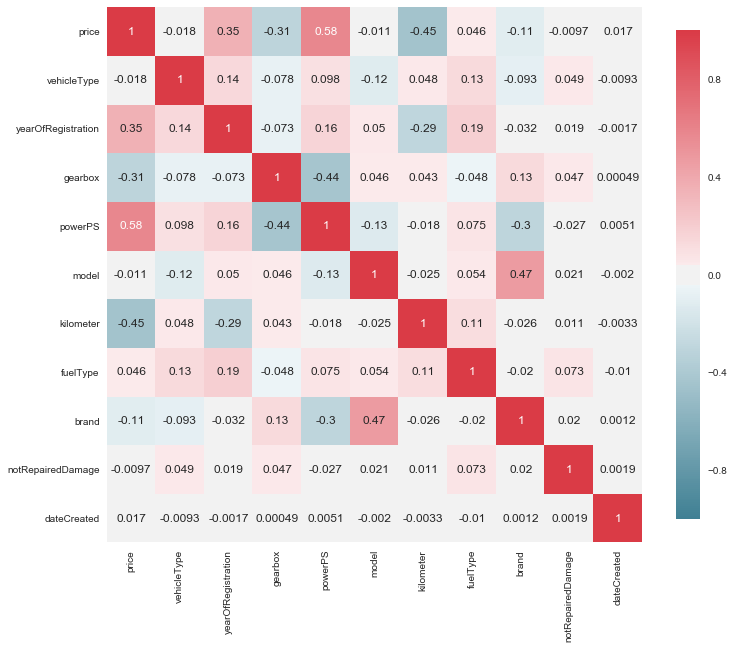

In [19]:
def corr_map(df1):
    corr = df1.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
corr_map(df1)
df1.corr()

*From the above heatmap, we can see that **powerPS** is the most influencing feature for the price.*

Ref: https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas